In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [6]:
df = pd.read_csv('Alcohol_Sales.csv',index_col = 'DATE',parse_dates = True)
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [7]:
df.tail()

,S4248SM144NCEN
DATE,
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174
2018-12-01,15504
2019-01-01,10718


In [5]:
len(df)

325

In [8]:
df.index.freq = 'MS'

<AxesSubplot:xlabel='DATE'>

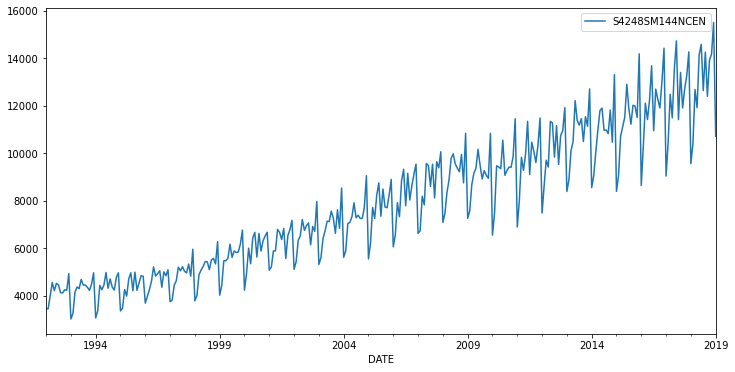

In [10]:
df.plot(figsize = (12,6))

In [15]:
df.columns

Index(['S4248SM144NCEN'], dtype='object')

In [17]:
df.columns = ['Sales']

In [18]:
df.head()

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [20]:
results = seasonal_decompose(df['Sales'])

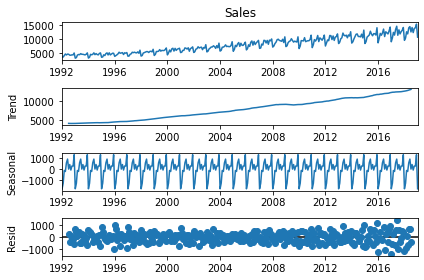

In [22]:
results.plot();

In [23]:
len(df)

325

In [24]:
train = df.iloc[:313]
test = df.iloc[313:]

In [29]:
scaler = MinMaxScaler()

In [30]:
scaler.fit(train)

MinMaxScaler()

In [31]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [33]:
scaled_train

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ],
       [0.12804513],
       [0.12266006],
       [0.09453799],
       [0.09359774],
       [0.10496624],
       [0.10334217],
       [0.16283443],
       [0.        ],
       [0.0196598 ],
       [0.09650397],
       [0.11505257],
       [0.10906915],
       [0.14231986],
       [0.12197624],
       [0.12189076],
       [0.11394136],
       [0.10300026],
       [0.12556629],
       [0.16608257],
       [0.00376101],
       [0.02957518],
       [0.12069408],
       [0.10513719],
       [0.12214719],
       [0.16702282],
       [0.11052227],
       [0.14428584],
       [0.11479614],
       [0.10402599],
       [0.14984187],
       [0.16582614],
       [0.02897684],
       [0.03872126],
       [0.10582101],
       [0.08231473],
       [0.14394393],
       [0.16608257],
       [0.10188905],
       [0.16830498],
       [0.10291478],
       [0.13018207],
       [0.15556885],
       [0.153

In [35]:
scaled_test

array([[0.63116506],
       [0.82502778],
       [0.75972305],
       [0.94939738],
       [0.98743482],
       [0.82135225],
       [0.95956919],
       [0.80049577],
       [0.93025045],
       [0.95247457],
       [1.0661595 ],
       [0.65706471]])

In [70]:
n_input = 12
n_features = 1
train_generator = TimeseriesGenerator(scaled_train,scaled_train,length = n_input,batch_size=1)



In [71]:
len(scaled_train)

313

In [84]:
len(train_generator)

301

In [85]:
train_generator[0]

(array([[[0.03658432],
         [0.03649885],
         [0.08299855],
         [0.13103684],
         [0.1017181 ],
         [0.12804513],
         [0.12266006],
         [0.09453799],
         [0.09359774],
         [0.10496624],
         [0.10334217],
         [0.16283443]]]),
 array([[0.]]))

In [86]:
type(train_generator[0])

tuple

In [87]:
x,y = train_generator[0]

In [88]:
x

array([[[0.03658432],
        [0.03649885],
        [0.08299855],
        [0.13103684],
        [0.1017181 ],
        [0.12804513],
        [0.12266006],
        [0.09453799],
        [0.09359774],
        [0.10496624],
        [0.10334217],
        [0.16283443]]])

In [77]:
y

array([[0.]])

In [78]:
scaled_train[:5]

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ]])

In [79]:
x.shape

(1, 12, 1)

In [80]:
x

array([[[0.03658432],
        [0.03649885],
        [0.08299855],
        [0.13103684],
        [0.1017181 ],
        [0.12804513],
        [0.12266006],
        [0.09453799],
        [0.09359774],
        [0.10496624],
        [0.10334217],
        [0.16283443]]])

In [82]:
model = Sequential()
model.add(LSTM(150,activation = 'relu',input_shape = (n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer = 'adam',loss = 'mse')


In [83]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [89]:
model.fit_generator(train_generator,epochs = 20)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
301/301 [==============================] - 2s 7ms/step - loss: 0.0142
Epoch 2/20
301/301 [==============================] - 2s 7ms/step - loss: 0.0089
Epoch 3/20
301/301 [==============================] - 2s 7ms/step - loss: 0.0080
Epoch 4/20
301/301 [==============================] - 2s 7ms/step - loss: 0.0080
Epoch 5/20
301/301 [==============================] - 2s 7ms/step - loss: 0.0086
Epoch 6/20
301/301 [==============================] - 2s 7ms/step - loss: 0.0053
Epoch 7/20
301/301 [==============================] - 2s 7ms/step - loss: 0.0043
Epoch 8/20
301/301 [==============================] - 2s 7ms/step - loss: 0.0033
Epoch 9/20
301/301 [==============================] - 2s 7ms/step - loss: 0.0032
Epoch 10/20
301/301 [==============================] - 2s 7ms/step - loss: 0.0024
Epoch 11/20
301/301 [==============================] - 2s 7ms/step - loss: 0.0028A: 0s - loss: 
Epoch 12/20
301/3

In [91]:
myloss = model.history.history['loss']

In [92]:
myloss

[0.014205650426447392,
 0.008936219848692417,
 0.008045007474720478,
 0.007960998453199863,
 0.008562464267015457,
 0.005331816151738167,
 0.004313112702220678,
 0.0033208364620804787,
 0.0031500759068876505,
 0.0023616936523467302,
 0.0028149490244686604,
 0.002210215898230672,
 0.002350396942347288,
 0.001823077560402453,
 0.0015786699950695038,
 0.0019393732072785497,
 0.0015337272780016065,
 0.00204442348331213,
 0.0017343999352306128,
 0.0015352066839113832]

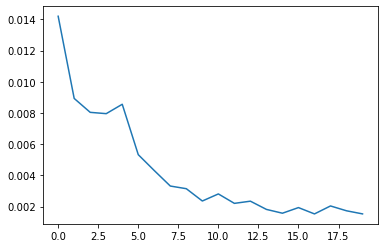

In [96]:
plt.plot(range(len(myloss)),myloss)


In [97]:
first_eval_batch = scaled_train[-12:]


In [98]:
len(scaled_train)

313

In [99]:
len(first_eval_batch)

12

In [100]:
first_eval_batch.shape

(12, 1)

In [101]:
first_eval_batch

array([[0.63432772],
       [0.80776135],
       [0.72313873],
       [0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ]])

In [102]:
first_eval_batch = first_eval_batch.reshape((1,n_input,n_features))

In [103]:
model.predict(first_eval_batch)

array([[0.73382676]], dtype=float32)

In [104]:
scaled_train

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ],
       [0.12804513],
       [0.12266006],
       [0.09453799],
       [0.09359774],
       [0.10496624],
       [0.10334217],
       [0.16283443],
       [0.        ],
       [0.0196598 ],
       [0.09650397],
       [0.11505257],
       [0.10906915],
       [0.14231986],
       [0.12197624],
       [0.12189076],
       [0.11394136],
       [0.10300026],
       [0.12556629],
       [0.16608257],
       [0.00376101],
       [0.02957518],
       [0.12069408],
       [0.10513719],
       [0.12214719],
       [0.16702282],
       [0.11052227],
       [0.14428584],
       [0.11479614],
       [0.10402599],
       [0.14984187],
       [0.16582614],
       [0.02897684],
       [0.03872126],
       [0.10582101],
       [0.08231473],
       [0.14394393],
       [0.16608257],
       [0.10188905],
       [0.16830498],
       [0.10291478],
       [0.13018207],
       [0.15556885],
       [0.153

In [106]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))
for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis = 1)
    
    

In [107]:
test_predictions

[array([0.73382676], dtype=float32),
 array([0.86346245], dtype=float32),
 array([0.80794317], dtype=float32),
 array([0.9719726], dtype=float32),
 array([1.045478], dtype=float32),
 array([0.7983101], dtype=float32),
 array([0.9478618], dtype=float32),
 array([0.8251128], dtype=float32),
 array([0.89878786], dtype=float32),
 array([0.94048727], dtype=float32),
 array([1.009703], dtype=float32),
 array([0.664623], dtype=float32)]

In [108]:
true_preds = scaler.inverse_transform(test_predictions)

In [109]:
true_preds

array([[11616.03922403],
       [13132.64718056],
       [12483.12709087],
       [14402.10726869],
       [15262.04696214],
       [12370.42987198],
       [14120.0350889 ],
       [12683.99487734],
       [13545.91912854],
       [14033.7605201 ],
       [14843.5158664 ],
       [10806.42473531]])

In [111]:
test['predictions'] = true_preds

<ipython-input-111-fb8da934d0a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predictions'] = true_preds


In [112]:
test

,Sales,predictions
DATE,,
2018-02-01,10415,11616.039224
2018-03-01,12683,13132.647181
2018-04-01,11919,12483.127091
2018-05-01,14138,14402.107269
2018-06-01,14583,15262.046962
2018-07-01,12640,12370.429872
2018-08-01,14257,14120.035089
2018-09-01,12396,12683.994877
2018-10-01,13914,13545.919129


In [113]:
model.save('myfirstrnn.h5')

In [115]:
from keras.models import load_model